# **Working memory training**: DMN, FPN rectuitment and integration stats

Karolina Finc | Centre for Modern Interdisciplinary Technologies, Nicolaus Copernicus University in Toruń, Poland

**Last edited:** 04-12-2019

Step 0: Setup
------------------

In [6]:
# Loading packages
library(psych)
library(tidyverse)
library(data.table)
library(nlme)
library(broom)

# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=25, colour='#262626ff'),
          axis.text.x = element_text(size=25, colour='#262626ff'),
          axis.title.y = element_text(size=25, colour='#262626ff'),
          axis.title.x  = element_text(size=25, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.8),
          panel.background = element_rect(fill="transparent",colour=NA),
          plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=25),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.15, "cm"),
          aspect.ratio = 1)


Step 1: Loading data
------------------

In [7]:
setwd("~/Dropbox/Projects/LearningBrain/")
fc_cartography = read.csv('data/neuroimaging/03-modularity/dynamic/03-allegiance_matrices/normalized_mean_allegiance_tidy.csv')

dualnback_exclude = c('sub-13', 'sub-21', 'sub-23', 'sub-50') # higly motion subjects in one of four sessions

fc_cartography$Session <- factor(fc_cartography$Session, levels = c('Naive', 'Early', 'Middle', 'Late'))
fc_cartography_clean <- fc_cartography %>% filter(!(Subject %in% dualnback_exclude))

dmn <- fc_cartography_clean %>% filter(Network == 'DM')
fpn <- fc_cartography_clean %>% filter(Network == 'FP')

Step 2: Multilevel modeling (FP recruitmnent)
--------------------------------

In [8]:
baseline <- lme(FP ~ 1, random = ~ 1 |Subject/Session, data = fpn, method = 'ML',  control=lmeControl(returnObject=TRUE))#control = list(opt = "optim"))
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)

anova(baseline, session, group, session_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = FP ~ 1, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",1,4,-251.4954,-238.9995,129.7477,,NA,NA
session,"lme.formula(fixed = FP ~ Session, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",2,7,-252.3264,-230.4586,133.1632,1 vs 2,6.831029,0.077482972
group,"lme.formula(fixed = FP ~ Session + Group, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",3,8,-258.3732,-233.3815,137.1866,2 vs 3,8.046828,0.004558341
session_group,"lme.formula(fixed = FP ~ Session + Group + Session:Group, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",4,11,-261.4129,-227.0493,141.7064,3 vs 4,9.039649,0.028768344


In [9]:
summary(session_group)

Linear mixed-effects model fit by maximum likelihood
 Data: fpn 
        AIC       BIC   logLik
  -261.4129 -227.0493 141.7064

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:  0.08106406

 Formula: ~1 | Session %in% Subject
        (Intercept)   Residual
StdDev:  0.07906403 0.03423566

Fixed effects: FP ~ Session + Group + Session:Group 
                                     Value  Std.Error  DF  t-value p-value
(Intercept)                      1.2623751 0.02645239 120 47.72253  0.0000
SessionEarly                     0.0640807 0.02724555 120  2.35197  0.0203
SessionMiddle                    0.0318583 0.02724555 120  1.16930  0.2446
SessionLate                      0.0289054 0.02724555 120  1.06092  0.2909
GroupExperimental                0.0910671 0.03740933  40  2.43434  0.0195
SessionEarly:GroupExperimental  -0.0693503 0.03853103 120 -1.79986  0.0744
SessionMiddle:GroupExperimental -0.0020580 0.03853103 120 -0.05341  0.9575
SessionLate:GroupExperimental    0.04462

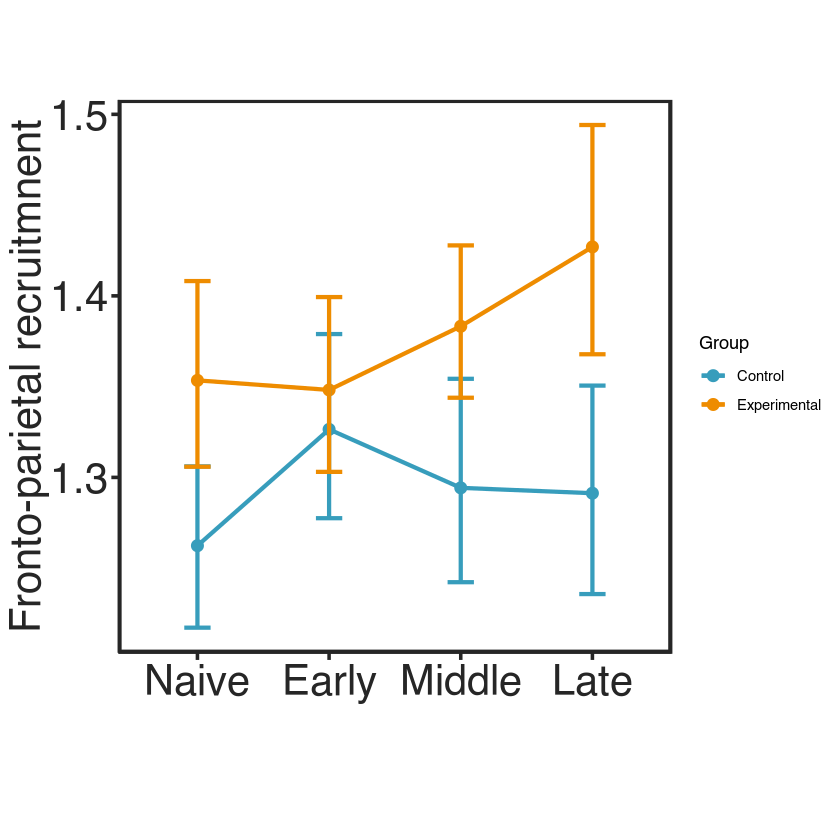

In [10]:
p <- ggplot(fpn, aes(x = Session, y = FP, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    ylab('Fronto-parietal recruitmnent') +
    xlab(' ') +
    theme_training
p

#ggsave("figures/Figure_FP_recr.pdf", plot = p, width = 6, height = 6, dpi = 300)  

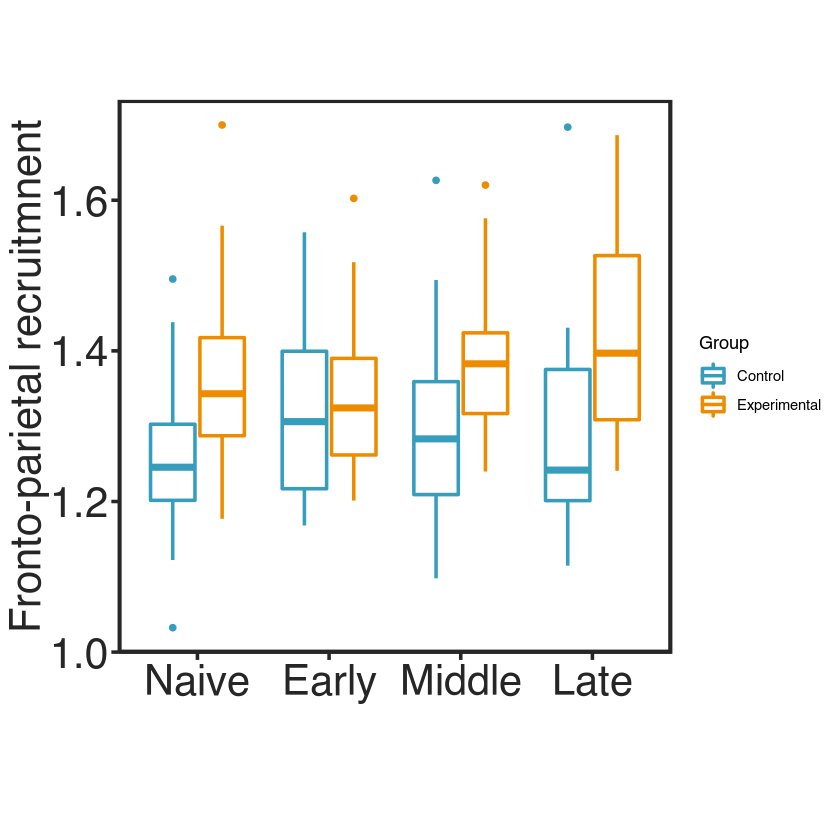

In [11]:
p <- ggplot(fpn, aes(x = Session, y = FP, col = Group)) + 
    geom_boxplot(size=1) + 
    ylab('Fronto-parietal recruitmnent') +
    scale_colour_manual(values=c('#379dbc','#ee8c00'))+
    theme_training +
    xlab(' ')
p

### Change in FP recruitmnent from Naive to Late session.

In [12]:
fpn %>% 
    group_by(Session, Group) %>% filter(Session %in% c('Naive', 'Late'))%>%
    summarize(mFP = mean(FP))

Session,Group,mFP
Naive,Control,1.262375
Naive,Experimental,1.353442
Late,Control,1.291280
Late,Experimental,1.426971


In [13]:
fpn_nl <- fpn %>% filter(Session %in% c('Naive', 'Late'))

fpn_exp <-  fpn_nl %>% filter(Group == 'Experimental') 
fpn_con <-  fpn_nl %>% filter(Group == 'Control') 

t.test(fpn_exp$FP ~ fpn_exp$Session, paired = TRUE)
t.test(fpn_con$FP ~ fpn_con$Session, paired = TRUE)


	Paired t-test

data:  fpn_exp$FP by fpn_exp$Session
t = -2.395, df = 20, p-value = 0.02653
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.137569679 -0.009488164
sample estimates:
mean of the differences 
            -0.07352892 



	Paired t-test

data:  fpn_con$FP by fpn_con$Session
t = -1.2095, df = 20, p-value = 0.2406
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07875616  0.02094533
sample estimates:
mean of the differences 
            -0.02890542 


### Group differences in Naive session

In [14]:
naive <- fpn_nl %>% filter(Session == 'Naive') 
t.test(naive$FP ~ naive$Group, paired = FALSE)
wilcox.test(naive$FP ~ naive$Group)


	Welch Two Sample t-test

data:  naive$FP by naive$Group
t = -2.5482, df = 39.214, p-value = 0.01486
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.16334016 -0.01879402
sample estimates:
     mean in group Control mean in group Experimental 
                  1.262375                   1.353442 



	Wilcoxon rank sum test

data:  naive$FP by naive$Group
W = 124, p-value = 0.01461
alternative hypothesis: true location shift is not equal to 0


Step 3: Multilevel modeling (DM recruitmnent)
--------------------------------

In [15]:
baseline <- lme(DM ~ 1, random = ~ 1 |Subject/Session, data = dmn, method = 'ML',  control=lmeControl(returnObject=TRUE))#control = list(opt = "optim"))
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)

anova(baseline, session, group, session_group) 

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = DM ~ 1, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",1,4,-259.2168,-246.7209,133.6084,,NA,NA
session,"lme.formula(fixed = DM ~ Session, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",2,7,-277.3878,-255.5201,145.6939,1 vs 2,24.171060,2.300777e-05
group,"lme.formula(fixed = DM ~ Session + Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",3,8,-279.3454,-254.3537,147.6727,2 vs 3,3.957601,4.666015e-02
session_group,"lme.formula(fixed = DM ~ Session + Group + Session:Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",4,11,-276.0023,-241.6387,149.0011,3 vs 4,2.656815,4.476161e-01


In [17]:
summary(session)

Linear mixed-effects model fit by maximum likelihood
 Data: fpn 
        AIC       BIC   logLik
  -580.5992 -558.7314 297.2996

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:  0.03457936

 Formula: ~1 | Session %in% Subject
        (Intercept)   Residual
StdDev:  0.03063129 0.01357088

Fixed effects: FP ~ Session 
                  Value   Std.Error  DF  t-value p-value
(Intercept)   0.4119962 0.007519368 123 54.79133  0.0000
SessionEarly  0.0160799 0.007399553 123  2.17309  0.0317
SessionMiddle 0.0208319 0.007399553 123  2.81529  0.0057
SessionLate   0.0284138 0.007399553 123  3.83993  0.0002
 Correlation: 
              (Intr) SssnEr SssnMd
SessionEarly  -0.492              
SessionMiddle -0.492  0.500       
SessionLate   -0.492  0.500  0.500

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-0.81047518 -0.27253386 -0.06676332  0.26882409  0.92495032 

Number of Observations: 168
Number of Groups: 
             Sub

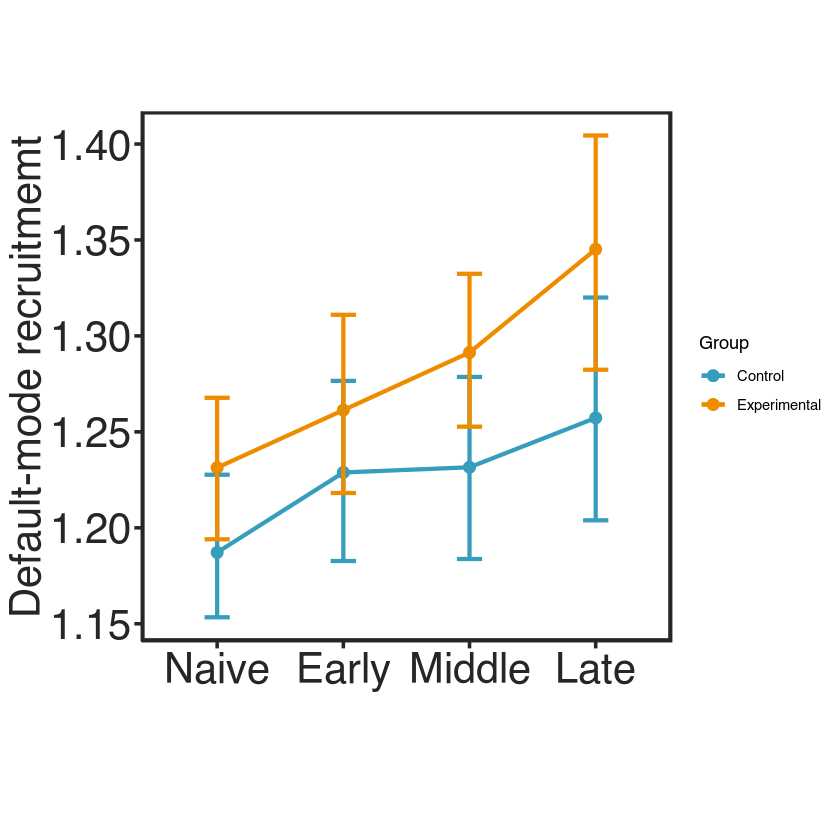

In [16]:
p <- ggplot(dmn, aes(x = Session, y = DM, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    ylab('Default-mode recruitmemt') +
    xlab(' ') +
    theme_training
p

#ggsave("figures/Figure_DM_recr.pdf", plot = p, width = 6, height = 6, dpi = 300)  

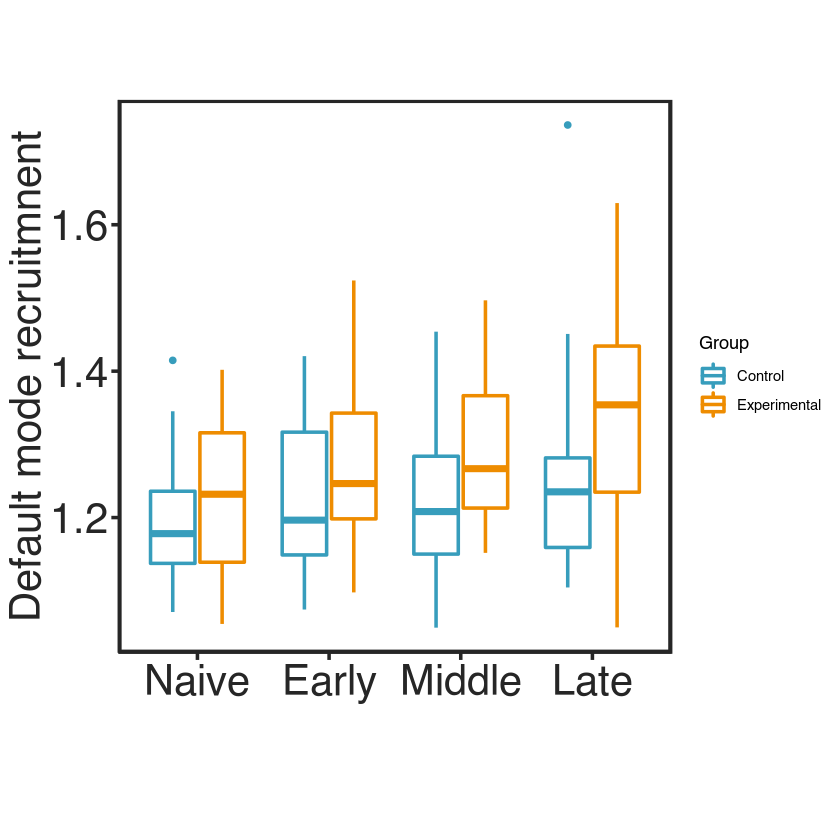

In [51]:
p <- ggplot(dmn, aes(x = Session, y = DM, col = Group)) + 
    geom_boxplot(size=1) + 
    ylab('Default mode recruitmnent') +
    scale_colour_manual(values=c('#379dbc','#ee8c00'))+
    theme_training +
    xlab(' ')
p

### Change in DM recruitmnent from Naive to Late session.

In [13]:
dmn_nl <- dmn %>% filter(Session %in% c('Naive', 'Late'))

dmn_exp <-  dmn_nl %>% filter(Group == 'Experimental') 
dmn_con <-  dmn_nl %>% filter(Group == 'Control') 

t.test(dmn_exp$DM ~ fpn_exp$Session, paired = TRUE)
t.test(dmn_con$DM ~ fpn_con$Session, paired = TRUE)


	Paired t-test

data:  dmn_exp$DM by fpn_exp$Session
t = -4.6698, df = 20, p-value = 0.0001474
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07204050 -0.02755267
sample estimates:
mean of the differences 
            -0.04979659 



	Paired t-test

data:  dmn_con$DM by fpn_con$Session
t = -2.9269, df = 20, p-value = 0.008337
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04792828 -0.00804021
sample estimates:
mean of the differences 
            -0.02798424 


In [14]:
dmn %>% 
    group_by(Session, Group) %>% filter(Session %in% c('Naive', 'Late'))%>%
    summarize(mDM = mean(DM))
    

Session,Group,mDM
Naive,Control,0.3538219
Naive,Experimental,0.3695092
Late,Control,0.3818061
Late,Experimental,0.4193058


Step 4: Multilevel modeling (FP-DM integration)
-----------------------------

In [17]:
baseline <- lme(FP ~ 1, random = ~ 1 |Subject/Session, data = dmn, method = 'ML',  control=lmeControl(returnObject=TRUE))#control = list(opt = "optim"))
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)

anova(baseline, session, group, session_group) 

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = FP ~ 1, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",1,4,-407.6669,-395.1710,207.8334,,NA,NA
session,"lme.formula(fixed = FP ~ Session, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",2,7,-421.4218,-399.5541,217.7109,1 vs 2,19.7549602,0.0001907914
group,"lme.formula(fixed = FP ~ Session + Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",3,8,-420.2580,-395.2663,218.1290,2 vs 3,0.8361606,0.3604971454
session_group,"lme.formula(fixed = FP ~ Session + Group + Session:Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",4,11,-428.5118,-394.1481,225.2559,3 vs 4,14.2537744,0.0025793047


In [18]:
summary(session_group)

Linear mixed-effects model fit by maximum likelihood
 Data: dmn 
        AIC       BIC   logLik
  -428.5118 -394.1481 225.2559

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:  0.05598093

 Formula: ~1 | Session %in% Subject
        (Intercept)   Residual
StdDev:  0.04626309 0.02085217

Fixed effects: FP ~ Session + Group + Session:Group 
                                     Value  Std.Error  DF  t-value p-value
(Intercept)                      0.9469736 0.01689519 120 56.04988  0.0000
SessionEarly                    -0.0360919 0.01604708 120 -2.24912  0.0263
SessionMiddle                   -0.0150934 0.01604708 120 -0.94057  0.3488
SessionLate                     -0.0346960 0.01604708 120 -2.16214  0.0326
GroupExperimental               -0.0181484 0.02389341  40 -0.75956  0.4520
SessionEarly:GroupExperimental   0.0490346 0.02269399 120  2.16069  0.0327
SessionMiddle:GroupExperimental -0.0122866 0.02269399 120 -0.54140  0.5892
SessionLate:GroupExperimental   -0.03387

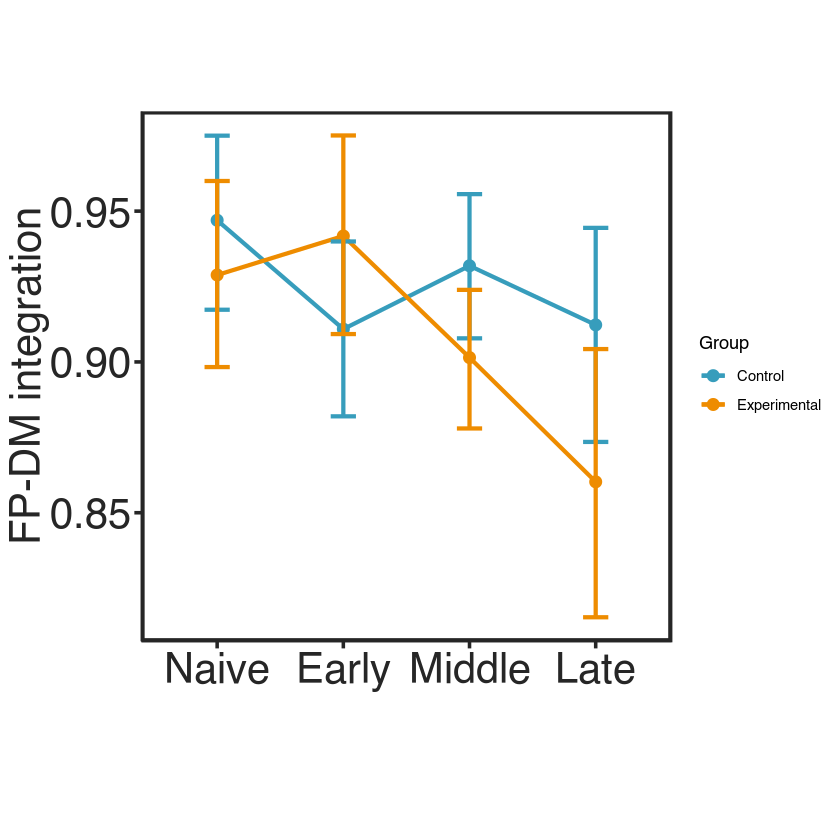

In [53]:
p <- ggplot(dmn, aes(x = Session, y = FP, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    ylab('FP-DM integration') +
    xlab(' ') +
    theme_training
p

#ggsave("figures/Figure_FPN-DMN_integ.pdf", plot = p, width = 6, height = 6, dpi = 300)  

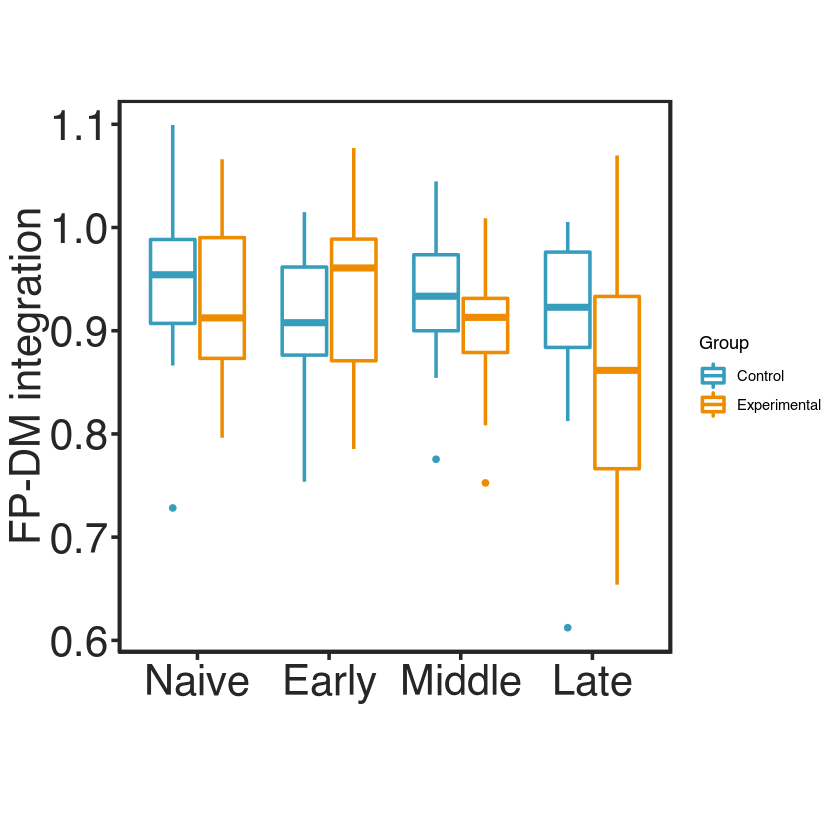

In [57]:
p <- ggplot(dmn, aes(x = Session, y = FP, col = Group)) + 
    geom_boxplot(size=1) + 
    ylab('FP-DM integration') +
    scale_colour_manual(values=c('#379dbc','#ee8c00'))+
    theme_training +
    xlab(' ')
p

### Change in FP-DM integration from Naive to Late session.

In [19]:
dmn_nl <- dmn %>% filter(Session %in% c('Naive', 'Late'))

dmn_exp <-  dmn_nl %>% filter(Group == 'Experimental') 
dmn_con <-  dmn_nl %>% filter(Group == 'Control') 

t.test(dmn_exp$FP ~ fpn_exp$Session, paired = TRUE)
t.test(dmn_con$FP ~ fpn_con$Session, paired = TRUE)


	Paired t-test

data:  dmn_exp$FP by fpn_exp$Session
t = 3.0565, df = 20, p-value = 0.006229
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02177539 0.11537468
sample estimates:
mean of the differences 
             0.06857503 



	Paired t-test

data:  dmn_con$FP by fpn_con$Session
t = 2.2917, df = 20, p-value = 0.03291
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.003114196 0.066277852
sample estimates:
mean of the differences 
             0.03469602 
